In [1]:
!pip install pandas
!pip install matplotlib

You should consider upgrading via the 'c:\users\black\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\black\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install tweepy 

You should consider upgrading via the 'c:\users\black\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import tweepy #used to work with Twitter's API
import webbrowser
import time
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import re
import json

In [4]:
consumer_key = "jzn0NU9EviCRRbONbUXX9a8VN" #pulled from developer account for Twitter
consumer_secret = "ULsKu9BjBPmZ3yY5NdS6EXUhGBNWKUWxtwKqFktBeqsOq1Y3ZQ" #pulled from developer account for Twitter
#key and secret is generated by Twitter developer account

In [5]:
callback_uri = 'oob'#url 

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri) #authorization to pull data from Twitter's API
redirect_url = auth.get_authorization_url() 
print(redirect_url)

https://api.twitter.com/oauth/authorize?oauth_token=83bQyAAAAAABQdBPAAABeo3DQ74


In [7]:
webbrowser.open(redirect_url)

True

In [8]:
user_pint_input = input("What's the pin value? ") #this is based upon Twitter Developer account
#Pin is generated new everytime this cell is run

What's the pin value? 0070811


In [9]:
auth.get_access_token(user_pint_input)

('781482721-6928Gtnj95bK82PW3fYDxHFvU5T4l3SPI4VVF1X2',
 'fTxclLJ4oxEmqshRhSbBibGoUiNq1l6941C0VyREdTf41')

In [10]:
print(auth.access_token, auth.access_token_secret)

781482721-6928Gtnj95bK82PW3fYDxHFvU5T4l3SPI4VVF1X2 fTxclLJ4oxEmqshRhSbBibGoUiNq1l6941C0VyREdTf41


In [11]:
api = tweepy.API(auth)

In [12]:
def extract_timeline_as_df(timeline_list):
    columns = set()
    allowed_types = [str, int]
    tweets_data = []
    for status in timeline_list:
        status_dict = dict(vars(status))
        keys = status_dict.keys()
        single_tweet_data = {"user": status.user.screen_name, "author": status.author.screen_name}
        for k in keys:
            try:
                v_type = type(status_dict[k])
            except:
                v_type = None
            if v_type != None:
                if v_type in allowed_types:
                    single_tweet_data[k] = status_dict[k]
                    columns.add(k)
        tweets_data.append(single_tweet_data)


    header_cols = list(columns)
    header_cols.append("user")
    header_cols.append('author')
    df = pd.DataFrame(tweets_data, columns=header_cols)
    return df

In [13]:
# pulls data from Visual Studio Code's twitter page https://twitter.com/code
screen_name = input("Enter twitter's username to pull data from: ") #"code"
#user = api.get_user(screen_name)
#user_timeline = user.timeline(screen_name)  # recent tweets are pulled in the spreadsheet
#print(user_timeline) 
# fetching the statuses
user_timeline = api.user_timeline(screen_name, count=201)#tweet count limit is 200
df1 = extract_timeline_as_df(user_timeline)
print(df1)


Enter twitter's username to pull data from: slykimba
                 source  quoted_status_id in_reply_to_user_id_str  \
0    Twitter for iPhone      1.413596e+18                     NaN   
1    Twitter for iPhone               NaN              2941097283   
2    Twitter for iPhone               NaN                     NaN   
3    Twitter for iPhone      1.413501e+18                     NaN   
4    Twitter for iPhone               NaN                     NaN   
..                  ...               ...                     ...   
194  Twitter for iPhone               NaN               335479645   
195  Twitter for iPhone      1.411015e+18                     NaN   
196  Twitter for iPhone               NaN                     NaN   
197  Twitter for iPhone               NaN                     NaN   
198  Twitter for iPhone               NaN                52568331   

                             source_url in_reply_to_status_id_str  \
0    http://twitter.com/download/iphone          

In [14]:
screen_name = input("Enter twitter's username to pull data from: ") #pulls data from Visual Studio Code's twitter page https://twitter.com/code
user = api.get_user(screen_name)
user_timeline = user.timeline() 
df1 = extract_timeline_as_df(user_timeline) #recent tweets are pulled in the spreadsheet
df1.head(201)

Enter twitter's username to pull data from: slykimba


,source,quoted_status_id,in_reply_to_user_id_str,source_url,in_reply_to_status_id_str,favorite_count,id_str,in_reply_to_status_id,in_reply_to_screen_name,retweet_count,quoted_status_id_str,text,lang,id,in_reply_to_user_id,user,author
0,Twitter for iPhone,1.413596e+18,NaN,http://twitter.com/download/iphone,NaN,1,1413619094218289155,NaN,NaN,0,1413596422696488961,Sendo has to be one of my favorites from the s...,en,1413619094218289155,NaN,SlyKimba,SlyKimba
1,Twitter for iPhone,NaN,2941097283,http://twitter.com/download/iphone,1413527731107684352,1,1413615886225874949,1.413528e+18,KingShawn_Larry,0,NaN,@KingShawn_Larry I’m ready for him to go compl...,en,1413615886225874949,2.941097e+09,SlyKimba,SlyKimba
2,Twitter for iPhone,NaN,NaN,http://twitter.com/download/iphone,NaN,9,1413569940121165826,NaN,NaN,0,NaN,I’m going to be boarding a plane for the first...,en,1413569940121165826,NaN,SlyKimba,SlyKimba
3,Twitter for iPhone,1.413501e+18,NaN,http://twitter.com/download/iphone,NaN,1,1413542995979292672,NaN,NaN,0,1413501363473031169,One of my favorite songs off the album. This i...,en,1413542995979292672,NaN,SlyKimba,SlyKimba
4,Twitter for iPhone,NaN,NaN,http://twitter.com/download/iphone,NaN,0,1413531547685228544,NaN,NaN,849,NaN,"RT @vincestaples: I can die tonight so today, ...",en,1413531547685228544,NaN,SlyKimba,SlyKimba
5,Twitter for iPhone,1.412894e+18,211698370,http://twitter.com/download/iphone,NaN,1,1413527559984271364,NaN,iwish_youwould,1,1412893638586212352,@iwish_youwould https://t.co/CzfQ2Xicb6,und,1413527559984271364,2.116984e+08,SlyKimba,SlyKimba
6,Twitter for iPhone,NaN,1062838567683137536,http://twitter.com/download/iphone,1413520606704852999,0,1413520793540104199,1.413521e+18,Asapoddfuture05,0,NaN,@Asapoddfuture05 Like that joint and Vince Sta...,en,1413520793540104199,1.062839e+18,SlyKimba,SlyKimba
7,Twitter for iPhone,NaN,NaN,http://twitter.com/download/iphone,NaN,2,1413519142322376708,NaN,NaN,2,NaN,IDK’s album is like that.,en,1413519142322376708,NaN,SlyKimba,SlyKimba
8,Twitter for iPhone,NaN,2941097283,http://twitter.com/download/iphone,1413506571074560008,1,1413508384972632064,1.413507e+18,KingShawn_Larry,0,NaN,@KingShawn_Larry MY BOY IS FINALLY BACK!!! \n\...,en,1413508384972632064,2.941097e+09,SlyKimba,SlyKimba
9,Twitter for iPhone,NaN,NaN,http://twitter.com/download/iphone,NaN,0,1413504813610921992,NaN,NaN,0,NaN,Wish I could have started off today like I did...,en,1413504813610921992,NaN,SlyKimba,SlyKimba


In [15]:
df1.describe()

,quoted_status_id,favorite_count,in_reply_to_status_id,retweet_count,id,in_reply_to_user_id
count,5.000000e+00,20.000000,4.000000e+00,20.00000,2.000000e+01,5.000000e+00
mean,1.413189e+18,0.850000,1.413514e+18,6959.20000,1.413464e+18,2.125677e+17
std,4.238428e+14,2.007224,1.260184e+13,18175.97353,1.026763e+14,4.753159e+17
min,1.412604e+18,0.000000,1.413500e+18,0.00000,1.413324e+18,2.116984e+08
25%,1.412894e+18,0.000000,1.413505e+18,0.00000,1.413327e+18,2.941097e+09
50%,1.413349e+18,0.000000,1.413514e+18,1.50000,1.413505e+18,2.941097e+09
75%,1.413501e+18,1.000000,1.413522e+18,4907.00000,1.413529e+18,4.389348e+09
max,1.413596e+18,9.000000,1.413528e+18,79837.00000,1.413619e+18,1.062839e+18


In [16]:
df1.shape

(20, 17)

In [17]:
df1.to_csv('tweetspreadsheet.csv', index=False)

In [18]:
df1_saved_file = pd.read_csv('tweetspreadsheet.csv')
df1_saved_file

,source,quoted_status_id,in_reply_to_user_id_str,source_url,in_reply_to_status_id_str,favorite_count,id_str,in_reply_to_status_id,in_reply_to_screen_name,retweet_count,quoted_status_id_str,text,lang,id,in_reply_to_user_id,user,author
0,Twitter for iPhone,1.413596e+18,NaN,http://twitter.com/download/iphone,NaN,1,1413619094218289155,NaN,NaN,0,1.413596e+18,Sendo has to be one of my favorites from the s...,en,1413619094218289155,NaN,SlyKimba,SlyKimba
1,Twitter for iPhone,NaN,2.941097e+09,http://twitter.com/download/iphone,1.413528e+18,1,1413615886225874949,1.413528e+18,KingShawn_Larry,0,NaN,@KingShawn_Larry I’m ready for him to go compl...,en,1413615886225874949,2.941097e+09,SlyKimba,SlyKimba
2,Twitter for iPhone,NaN,NaN,http://twitter.com/download/iphone,NaN,9,1413569940121165826,NaN,NaN,0,NaN,I’m going to be boarding a plane for the first...,en,1413569940121165826,NaN,SlyKimba,SlyKimba
3,Twitter for iPhone,1.413501e+18,NaN,http://twitter.com/download/iphone,NaN,1,1413542995979292672,NaN,NaN,0,1.413501e+18,One of my favorite songs off the album. This i...,en,1413542995979292672,NaN,SlyKimba,SlyKimba
4,Twitter for iPhone,NaN,NaN,http://twitter.com/download/iphone,NaN,0,1413531547685228544,NaN,NaN,849,NaN,"RT @vincestaples: I can die tonight so today, ...",en,1413531547685228544,NaN,SlyKimba,SlyKimba
5,Twitter for iPhone,1.412894e+18,2.116984e+08,http://twitter.com/download/iphone,NaN,1,1413527559984271364,NaN,iwish_youwould,1,1.412894e+18,@iwish_youwould https://t.co/CzfQ2Xicb6,und,1413527559984271364,2.116984e+08,SlyKimba,SlyKimba
6,Twitter for iPhone,NaN,1.062839e+18,http://twitter.com/download/iphone,1.413521e+18,0,1413520793540104199,1.413521e+18,Asapoddfuture05,0,NaN,@Asapoddfuture05 Like that joint and Vince Sta...,en,1413520793540104199,1.062839e+18,SlyKimba,SlyKimba
7,Twitter for iPhone,NaN,NaN,http://twitter.com/download/iphone,NaN,2,1413519142322376708,NaN,NaN,2,NaN,IDK’s album is like that.,en,1413519142322376708,NaN,SlyKimba,SlyKimba
8,Twitter for iPhone,NaN,2.941097e+09,http://twitter.com/download/iphone,1.413507e+18,1,1413508384972632064,1.413507e+18,KingShawn_Larry,0,NaN,@KingShawn_Larry MY BOY IS FINALLY BACK!!! \n\...,en,1413508384972632064,2.941097e+09,SlyKimba,SlyKimba
9,Twitter for iPhone,NaN,NaN,http://twitter.com/download/iphone,NaN,0,1413504813610921992,NaN,NaN,0,NaN,Wish I could have started off today like I did...,en,1413504813610921992,NaN,SlyKimba,SlyKimba


In [19]:
# screen name of the account to be fetched
screen_name = input("Enter twitter's username to see recent tweet interactions: ")
#will display last fetched tweet as the Twitter account's "Pinned Tweet" if they have a pinned tweet
  
# number of statuses to be fetched
count = 5
  
# fetching the statuses
statuses = api.user_timeline(screen_name, count = count)
  
# printing the statuses
for status in statuses:
    print(status.text, end = "\n\n") 

Enter twitter's username to see recent tweet interactions: code
RT @jviide: Terminal panels can now be moved to the editor area in the newest VSCode / @code version 😍 https://t.co/CHT2olQ9gg

@MartijnSaly @github We have some docs to get you started! This is about using Jupyter with Python (but there are k… https://t.co/plJo71ldj2

Gist + notepad + VS Code = GistPad 📘
View and edit your @GitHub Gist directly in VS Code, as if they were local fil… https://t.co/sHVzxSyFyb

RT @TylerLeonhardt: Look at that badge to open in @code ✨

Pretty easy markdown to add to README in a GitHub repo:

[![Open in Visual Studi…

@KlostermannSan @github Traditionally, we've named releases according to the month work was done in. Our team did m… https://t.co/pNeyRFMsU9



In [20]:
#search_words = ["#covid19", "2020", "lockdown"]
key_word = input("Enter key word to  pull from Twitter: ")#'@code' #searches all tweets that reference the key_word specified 
date_since = "2021-06-21"

tweets = tweepy.Cursor(api.search, key_word, geocode="38.892062,-77.019912,3000km", lang="en", since=date_since).items(10)
## the geocode is for Washington, DC; format for geocode="lattitude,longitude,radius"
## radius should be in miles or km
#items references the number of tweets to pull 


for tweet in tweets:
    print("created_at: {}\nuser: {}\ntweet text: {}\ngeo_location: {}".
            format(tweet.created_at, tweet.user.screen_name, tweet.text, tweet.user.location))
    print("\n")
## tweet.user.location will give you the general location of the user and not the particular location for the tweet itself, as it turns out, most of the users do not share the exact location of the tweet

Enter key word to  pull from Twitter: python
created_at: 2021-07-10 00:13:43
user: devvibesbot
tweet text: RT @Skyline_tutors: Pay us this weekend do your 
#microbiology
#python
#h/workdue 
#Chemistry
#Onlineclass
#Essaypay
#Econometrics
#Statist…
geo_location: 


created_at: 2021-07-10 00:13:41
user: IRudyak
tweet text: RT @fchollet: The second edition of Deep Learning with Python will be available in stores around September-October. Meanwhile, the code exa…
geo_location: Berlin, Germany


created_at: 2021-07-10 00:13:38
user: devvibesbot
tweet text: RT @Skyline_tutors: Pay us this weekend do your 
#microbiology
#python
#h/workdue 
#Chemistry
#Onlineclass
#Essaypay
#Econometrics
#Statist…
geo_location: 


created_at: 2021-07-10 00:13:33
user: BotFemale
tweet text: RT @Skyline_tutors: Pay us this weekend do your 
#microbiology
#python
#h/workdue 
#Chemistry
#Onlineclass:
#Essaypay
#Econometrics
#Statis…
geo_location: 


created_at: 2021-07-10 00:13:33
user: BotFemale
tweet text: RT @Sk

In [21]:
#searches all relevant tweet as specified from date range 
print("Date format is as follows: Year-Month-Day= 0000-00-00")
print("Date range must be within a 7 day range")
date_since = input("Enter beginging date: ")#'2021-06-14'
date_until = input("Enter last date: ")#'2021-06-21'
tweets = tweepy.Cursor(api.search, geocode="38.892062,-77.019912,3000km", lang="en", q= input("Enter key word to search through Twitter's API of relevant Tweets: "), since=date_since,until=date_until).items(10) #'olympic'
for tweet in tweets:         
    print (tweet.text)  

Date format is as follows: Year-Month-Day= 0000-00-00
Date range must be within a 7 day range
Enter beginging date: 2021-07-02
Enter last date: 2021-07-09
Enter key word to search through Twitter's API of relevant Tweets: python
RT @ASSIGNMENTSHE17: We guarantee As in
Essay
Homework
Math
Algebra
Accounting
Psychology
Medicine
English
Genetics
Ecology
Trigonometry
Hi…
RT @ASSIGNMENTSHE17: We guarantee As in
Essay
Homework
Math
Algebra
Accounting
Psychology
Medicine
English
Genetics
Ecology
Trigonometry
Hi…
RT @josejorgexl: Python practitioners...

Just use the sklearn.neighbors.KernelDensity class

It receives two parameters

kernel: the type…
RT @ASSIGNMENTSHE17: We guarantee As in
Essay
Homework
Math
Algebra
Accounting
Psychology
Medicine
English
Genetics
Ecology
Trigonometry
Hi…
We guarantee As in
Essay
Homework
Math
Algebra
Accounting
Psychology
Medicine
English
Genetics
Ecology
Trigonometry… https://t.co/4xvNyInGVG
Lmaooo they caught the python and put it back in the Mall zoo. I wa

In [22]:
for status in tweepy.Cursor(api.user_timeline, screen_name= input("Enter Twitter Username: "), tweet_mode="extended").items(): #'@code'
    print(status.full_text)

Enter Twitter Username: slykimba
Sendo has to be one of my favorites from the series. https://t.co/JIXimyz3un
@KingShawn_Larry I’m ready for him to go completely wild 😂
I’m going to be boarding a plane for the first time in basically 15 years this Sunday 🥲 Wow. Crazy to think that.
One of my favorite songs off the album. This is beautiful. 😭 https://t.co/a4gw8gyqEj
RT @vincestaples: I can die tonight so today, I’m finna go get paid.  https://t.co/BqoxDYtAU3
@iwish_youwould https://t.co/CzfQ2Xicb6
@Asapoddfuture05 Like that joint and Vince Staple’s have had me vibing all day. Snoh Alegra’s album is next.
IDK’s album is like that.
@KingShawn_Larry MY BOY IS FINALLY BACK!!! 

Took his sweet ass time 🙄
Wish I could have started off today like I did yesterday 🥴

But we got new music today so it’s alright I guess lol.
@Dexsavy My best ones from last night lol. https://t.co/KhO15SSO65
🔥🔥🔥 https://t.co/QEkc35sUPz
RT @saurrrrrrr: parenting https://t.co/0ZOrM0gwDS
RT @OldPersonOnline: https://t.

THE FUCKING TALKBOX 😭 like it makes no sense for it to be this good.
This Gogo version of K.K Crusin is something I didn’t know I needed in my life but lawd. 😭  just HEAT.
If you don’t have this I highly recommend it. https://t.co/AKHxEiUNbi
Every time I try to sleep in, I can’t and this is me fighting the fact that I’m awake. https://t.co/C8hU4aHdzF
I fell asleep after 3am and I’m off today. Why tf am I up!? 💀 I just want sleep dawg.
There are easily a handful of people that are my favorite when it comes to drinking and spending time with them. @Brockavelli has definitely solidified his spot in the top tier.
RT @Danny8bit: The concept of Luigi having lightning powers, to further differentiate him from Mario, really should’ve stuck around and bec…
RT @dokkan_global: 2 days until our 6th Anniversary!

Here is a special countdown message from Shigeru Nakahara, the voice actor of Android…
720/981.
RT @itsmozzybro: @__MikeAnthony https://t.co/L3Zg9TI3j1
RT @mistyigel: Ace Attorney, but it'

Episode 701 of One Piece 😌 

Slowly catching up in terms of the anime.
RT @at_nocontext: https://t.co/rqxvQy3vdR
RT @MatttGFX: this is a fucking hilarious visual https://t.co/uNMCvAQlSf
Bro the fact that after 1000 chapters, One Piece still has me coming up with multiple theories just goes to show how masterful a storyteller Oda is.
ON EVERYTHING 

Still one of the most insane things I’ve ever seen. Daigo will forever be legendary to me for this moment 😭 https://t.co/3tgAko2Fcb
@BazookaJoeee I definitely thought of this theory in the past. They always say that the person would blow up but we’ve seen Luffy blow himself up multiple times. I also think it could have something to do with an awakening.
@BazookaJoeee As long as it’s not no damn long ass backstory yo. We’ve had enough flashbacks. 

But it seems like we’re continuing where the last chapter stopped so we might get some answers
@BazookaJoeee On everything!!! I need that full backstory dawg cause I know it’s gonna shake some shit

RT @WholesomeMeme: https://t.co/lAi1eKRMtQ
@HumbergerHelper @HDAceeD This fucking killed me 😂
@HDAceeD Naw man, it’s like me having my night cap 😂 or a morning cap when I wake up too early on the weekends and need a nap.
RT @dokkan_official: 近日登場予定！
新キャラクターたちのバトル演出をご紹介！
#ドッカンバトル #ドラゴンボール https://t.co/YzcVjHMOe6
My homie said it was 110 degrees out there and I said fuck no 💀 lmao https://t.co/QNKZb1ItEx
Damn that Steak Quesadilla slapped
@vahamailo Having to call sucks but I get it. Ima see how I feel tomorrow
@vahamailo I might actually be free that day. Although I will probably die if I go 💀 Im so out of shape.
@JussdinV2 This shit has just had me so confused 💀 like what is going on in homies head
@vahamailo Nothing but dedication and practice. I’m sure you’ll keep killing it and competitions will line up as long as you keep shooting for it. Can’t wait to see how far you go and what you can teach me 😂
@vahamailo Whats up? Im actually really down for that shit 😂 i had a great time in F

I should play some Secret of Mana today. I need to grind because the way that boss whooped my ass was disrespectful 💀
@SnorlaxOfWuTang I love the cactus conductor 😭 so adorable
My mom really made me write my alphabet multiple times a day in English, Spanish, and cursive every day thinking it would improve my handwriting just for it to not do shit 🥲 lmaoooooo
@bbnojutsu If you ever wanna practice that Spanish let me know! I’ve had a very informal teaching of it considering my parents taught me it but they definitely made me write my alphabet and speak it every day growing up 😭
@Dexsavy I am weak af 😂 all of the “Ge’s”
@asvpmai So have you listened to Rimon? 👀 you would love her!!! 

I can’t say shit about 21 because I’m actually a fan but verdicts out on Robb Banks 😂
@hailtitss LMAOOO wtf is this!?! 😂
@sweetxsage As she deserves!!
Naw bruh. That actually put a smile on my face 😭 The fact that I could put on for both Morgan State and Kappa Kappa Psi on the news is dope af.
@vahamailo I a

@chocoletedaddy I imagine it being more of a wobble lmaoooo
@chocoletedaddy That sounds like pain lol
@FunkyBobMusic That’s a hell of a comparison 😂
“See for yall, the skys the limit. For us? The skys just what we stand on to reach the beyond.” 

RUNITUP!! Easily my favorite song off the album.
A week ago had you told me that one of my favorite songs of 2021 would have NBA Youngboy on it I would have thought you were smoking dick. 

Tyler just knows how to make magic. ✨
Well excuse the fuck out of me, I’ll go sip on my bourbon now 😂 https://t.co/D9YK0Yh6Nm https://t.co/zcl6Zt4keh
Another week of not making the bucket. But it’s cool! That form is getting close to perfection and soon enough we going to get that wet bucket. 

Shooters gon keep shooting!! (&amp; no Im not really talking about basketball lol)
@iwish_youwould I’m sorry, since when do you play Folk flute!? 😂 https://t.co/gxdN8imhUI
YALL SEE ME BOY RANDY!?! I absolutely love this 😭🔥🔥 Though Peter looking like Bison is making m

Can we please get some new Mega Man news dawg 😒😒 https://t.co/uYQzcw1c0F
@vahamailo Dawg I played video games this weekend for the first time in months and lawd did it feel so good. I strongly encourage it playa.
Wait I’m interested.... https://t.co/OtL2OQuwiO
RT @tylerthecreator: 3 DAYS: CALL ME IF YOU GET LOST https://t.co/Bn8qhtoqyZ
Please let there be a Freddie &amp; Tyler collab 😭😭 I would absolutely lose it!!! https://t.co/NkTfZ6BS13
RT @1mshit_: WHY MY CAT SITTING LIKE THAT https://t.co/vSnhecFSBy
@Asapoddfuture05 A BANGER
Naw bruh 😭😭 you just gotta block shorty and forget she ever existed. This is all types of heinous. https://t.co/NzjCwr9pNW
Accounting is great in the fact that when you have all the backup nobody can dispute you 😂
My energy literally covers for the bags under my eyes and it be getting to me cause I be TIRED. 😭 I’m not happy these sleep issues started back up.
Aye this was tough 😂 https://t.co/xFI5sxXbAO
@CartierWave_ I’m hip, but it’s still sad that I can’t ev

@YaYa_Niche 😂😂😂😂 could have driven there for all that.
@asvpmai Lmaoooo. 😭 full research mode! But I’m going to Grand Rapids, Michigan. There’s a national convention for my fraternity so I’ll be hitting that while making some side moves.
@asvpmai This gif though 😭 shit I feel like this is gonna be me after my trip next month
Today was truly a self care day and I can truly say it was great. I love it when I’m happy me.
No but like this Jazz manga is actually turning out to be WAYYY better than I thought. 😭😭 so happy I bought it!
“Doooobie Doobie Doot Doo Doo” is taking me out 😂 because I know that’s exactly how I sound when I listen to music and be out in public. https://t.co/HYt1QqguIz
😂😂😂 i love the diagram showing you the fingering. https://t.co/VggfsYlaWa
@hailtitss YES SIRRRRR
@Leachboy_Cinco this is a very you comment. https://t.co/ZacLvCgP46
🥺🥺🥺 too precious!!! https://t.co/7IwMAhJ6DN
Bill Collector 😂 https://t.co/CFIfYkTgpZ
RT @NotPotBol: We are stronger https://t.co/6Dh3LwyihW


@BALDandBouje Yes you did lol
Go home and sleep before I break those knee caps https://t.co/AUngaCrnGZ https://t.co/2VFW8f6hvp
Tonight was well needed after such a long week. 

Sometimes just being around certain people helps with your stress.
I clearly need someone in my life that’s okay with me blowing a bag on Nintendo games because honestly they might have half a stack of my money for the next year 💀
@Leachboy_Cinco Smoking straight dick yo https://t.co/bwQnzRnKUt
I enjoyed the bar only because I got to watch the game at the same time
I have to say, sweatshirts and thot shorts are some of my favorite outfits. 

Something about long sleeves and shorts that just does it for me.
RT @kezuru_: 🐈‍⬛ https://t.co/pyLQNkCKAI
I wanna say the series but it recently got a remake so idk if that’s technically spoilers or not 😭 https://t.co/WfYROKVlzT
RT @tylerthecreator: CALL ME IF YOU GET LOST: JUNE 25TH https://t.co/2FkiNkLJl5
RT @HDAceeD: https://t.co/IghFcGidKU
While I did not get the opport

The little Laptop 🥺🥺🥺 I need this for Alice. https://t.co/YcxHPPOUFj
Wait wait wait.... where are they reading One Piece in Spanish at though?! I needs that!!! Expeditiously! https://t.co/IIGxfrw2hK
This man raging will never not be funny to me 😂 https://t.co/Kb0dfoh9kx
@OsamuJas Just heat 😭
@TajerahAngel King of the Hill is so underappreciated 😂
I love that Todo is basically great at everything 😂 Hakari probably be in class saying “Fuck School” every day. https://t.co/qtBKONLLCK
😂😂😂 Zack Fox is a national treasure. https://t.co/Z4Sr84ARal
@Mnny_Tz I peeped random episodes before they were adapting the manga and it was cool but this is what I’ve been waiting for.
RT @menokonomi: https://t.co/luIgnbfz3A
Clearly I need to start watching Boruto if they making it this far. I just know that fight with Jigen is bout to be dumb in terms of animation 😭😭 https://t.co/cZb4XTr0KV
Wow this is heat. 🔥🔥 https://t.co/CwvZpf1oki
RT @AmazonChique: RT if Harry Potter, the ubiquitous YA franchise of our 

I was wearing jeans at work today but had to throw on a blazer and dress shirt for a meeting and I felt like a cool dad at his kids soccer game after work 🤣
There was a lot more interest in this that I thought 😅 Might start this discord up soon enough! https://t.co/z5aJGGR0iH
This is like my 5th time rereading the Shibuya arc and it is still HEAT. 

Anime fans are not ready for JJK.
RT @TheePrincessJaz: The adult swim trend has been one of the best thing to come from tik tok https://t.co/WpiqOMAKzL
RT @KingKeeme: Drake is on everyone's album but his own.
RT @sungodpxllz: https://t.co/yJuzB3yUq4
RT @sleeppy_cutie: “Just shoot your shot, what could go wrong?” 
Me:
RT @zackfox: y’all hate the talking phase so much ok cut to the chase and send a bootyhole pic ándale ándale
Well next week will be eventful.
RT @NintendoAmerica: Time flies! On this day 20 years ago, the Game Boy Advance was released. What was your first &amp; favorite memory with th…
@Kel_Kels_ Don’t be capping on my TL lol h

@Kaelan25 This actually makes me happy to see. Not every Triple AAA game needs to abuse their developers
@Dexsavy He ugly af but I respect him for being so hard boiled lol
Let BTC climb back up. Let me recoup some more earnings lol.
Needs that. https://t.co/VYLwsLTfDa
@HDAceeD Honestly.... I want to say we could be interchangeable with the two because we definitely have qualities of both
“My Brother!!” 😂😂 i love Todo yo. https://t.co/6OXdSFwmU4
RT @mischelle__s: just remember https://t.co/zvBxgIaXsN
Damn, that means I need a haircut this weekend lol.
@JussdinV2 He has completely thrown the story left in the best way possible
@milanalysee Joobrdoobn
RT @CowboyBebop: 🎷 Ba-dup ba-dup ba-dup ba-dup ba-DAP

🥁🥁🥁🥁

🎸 Do-doo do-doo-doo do-doo do-doo-doo

🗣 I think it's time we blow this scene,…
@JussdinV2 Oh yeah 😭 he still getting abused
@JussdinV2 😭 what movie you on?
@Jay_Cee_Penny Ma’am, save yo money and go ransack your closet 😂
Whoever sent Kim K. That Diamond ring and a plan b pill dese

RT @MangaMoguraRE: Poster for "One Piece" volume 99 by Eiichirou Oda. https://t.co/k2pOAIR0lz
@Kel_Kels_ I don’t have any lol
@Kel_Kels_ Shit some of those are nice 😭 I wish I knew my ring size
RT @curtisjuro: Mfs in One Piece have powers that can destroy the world, people can turn into literal magma and black holes, but Usopp? He’…
RT @SaraRose2990: Never have I related more to a tweet https://t.co/1oUwZ3Li6l
This clip always hits. 😭 https://t.co/n8M6w2NSei
@vahamailo Ima let you know. Think I might just chill tomorrow since I’m supposed to go out Saturday
Top fucking tier 😂 https://t.co/FZZ6p2FNpQ
RT @decimo2times: Need Arc System Works to stop playing with my feelings and give us a fuckin One Piece fighting game..
RT @MorgansGoodTime: Season 0 Yugioh is a wonderful experience https://t.co/7Wq4JSGphM
Put 3 more coworkers on to Pho 😌
@_ilikekelsayy They don’t have men’s stuff in stock enough for me to allow them to snatch my money like that 😂
@iwish_youwould I might hit up Quickway be

RT @papidelabodega: I don’t care how many ways I see you nude, I still want to continue to see it
@spicytamale007 The shade 😂 but I get it
RT @KappaKappaPsi: We are excited to announce the 2019-2021 Chapter Leadership Award Winners!!
.
As winners, these chapters are now finalis…
FUCK I HAVENT READ KINGDOM IN WEEKS!!! 

I can’t believe I forgot about it 🤯 https://t.co/K15yDca9nR
@SK_Meech At least you know lol
“Why are you like this?!”
“Fuck it idk. Go ask the stars” https://t.co/NFBl7lXSZi
@Leachboy_Cinco LMFAOOOOOOO. 

That person would either love having us around or would do everything in their power not to be near us.
Have you met us? Majority of the people in my life both love and hate me. I’m not surprised 😂 

Honorable mentions go out to Gemini’s and *sometimes* Scorpio for this spot https://t.co/gYeNTM02QF
RT @19Phranchize: Bringing this back to the TL https://t.co/zDAAurpnaR
I’m sure someone on my TL has a MacBook Pro. https://t.co/oSxJ5990jn
@SK_Meech Looking forward to this 

@Diced_Mangos It’s not an actual Kuerig, it’s some other brand but it was $40. Couldn’t beat that.
RT @waveman_mike: Mission Complete!!! 👨🏾‍🎓 
Next Level Loading!!! 😉💰

📸: @FreeRealest https://t.co/hzbu3vM5gC
Got my Kuerig 🥳

Now to stop spending money at Target lol.
RT @AdieISalazar: lmfaooo
@CartierWave_ Lets not talk about how much money I’m down.... I’m just waiting for the eventual bounce back
@CartierWave_ It’ll come back
@shannersssss You know I commend you because for once you actually did reply https://t.co/E4NUxDZiUC
@lovingyourgirl It wasn’t but it also wasn’t worth no damn $60 lol. 

The only merit to it is the fact that it still gets DLC, but I’m not paying for that.
@becauseitskb It was such a simple shirt but something inside of me couldn’t let me leave without it 😭
@SK_Meech It is an amazing thing. Highly recommended. Low maintenance pet who provides great company. Main con is they will knock some shit over though lol
@GreenSquareGang How is it proof!?!
@platinumdess Ba

RT @Leachboy_Cinco: Shoutout to all the grads these past few days, I'm really proud of y'all. An extra special hooray for the frat and M3 g…
@TheNerdyEsq Im mad I can’t cop these boxers!! Lol those black satin joints were a vibe lol
RT @EddyyNY: @rihanna we tryna be sluts and you not delivering ...
@TheNerdyEsq I’ve been checking for like weeks because they got me a couple months ago and I got a credit just sitting there 😭 so I’m like I need to treat myself lol
@BALDandBouje Like bruh, I got this credit just sitting there and I’m like I need to use it! Lol they already got my money so they don’t want me to spend it 😂
@TheNerdyEsq She WAS 😒 those hoes haven’t been in stock for a good minute. All she’s had for men lately is a robe.
RT @PlusNiggaHokage: Literally how i be every time Chloe Bailey posts something https://t.co/0I635xJBWA
All I wanted was these Satin boxers from Savage x Fenty but nooooo, they never wanna be in stock 😒 I’ma end up just getting the robe probably. Gotta use thi

@HDAceeD Sir you tryna have your heart racing lmao
@FunkyBobMusic “Train 4 days an hour” 😂😂😂
RT @VGFGamers: Not interested. https://t.co/uhbvlmvBLL
Thank you to everyone that wished me well. I’ve been in an awkward state so I’m sorry if I didn’t reply. I just hope I have some good news for y’all soon. https://t.co/xDJmVpOZaK
Lets get it. https://t.co/FpgSlfLag3
Send me yall energy today please. Need all the positivity for today. https://t.co/w9emhojgHD
RT @OnePieceAnime: Happy birthday, Monkey D. Garp! ⚓ #onepiece https://t.co/PX4XzM431z
RT @TheAnimeEra: Anime : One Piece https://t.co/UsFC8zyd0Z
RT @Piphism: The way I’ve been letting this loop. https://t.co/jXHWVUf70f
@artbyels Yo i tried their refresher or whatever and it was wack af. I’m only going there for coffee from now on 😭
RT @ChloeBailey: be careful with me 💔 @iamcardib https://t.co/3bKdZe9Par
RT @SuliOfThe_619: Has anyone else made this yet?😭 https://t.co/2hehFKVuwM
Today was a really good day. I’m grateful for that.
RT @Dann

RT @kbsoperfect: Fuck sex I’m tryna be the reason you smile everyday. We still gonna fuck tho 😂
RT @RiseFallNickBck: He's the only one who speaks the truth. https://t.co/nAy1guLFQg
@JussdinV2 LMAOOOO. I’m hoping for your safety 😂
@questtcat Definitely using this line in the future 😂
🧐🧐🧐 I’m thinking https://t.co/jUb6vbTJtf
Easily one of my favorite games of all time 😭 The aesthetic, the level up system, the actual story. Overall an amazing game. https://t.co/98PgGmliWA
RT @KFartom: after breakdowns: https://t.co/GPvKqn0CNd
@Dexsavy Ima have to rob you
Mannnn Comedy Central and Adult swim used to go wild on that On Demand 😂 https://t.co/vIFBGCmwUA
So I got my second dose yesterday. 

The worst part about it was me catching a fever of 105 at 1am. 

Besides that, just some arm pain, fatigue, and mild headaches. We’re past the 24 hour mark so I’m sure there should be no more crazy symptoms.
@Dexsavy Wait; Crystal? 🧐
RT @antii_s0cial: I love that y’all post tik toks so I never have to go on

@hailtitss I need to catch up 😭 I’m still watching through Dressrosa. Although I cheated and watched the flashback episodes because I had too
@Kel_Kels_ Wait, only!? Maybe I need to look at more flights 😂

But I’m sure they’ll work with you.
@Kel_Kels_ You rich, just get a new one. 

But on a serious note, they should be able to just adjust the dates for a new flight at a later time. Hopefully at least.
@TheNerdyEsq https://t.co/sZS5VbrULG
@HDAceeD I still have never had some I think lol
RT @BALDandBouje: Earned, never given.

#OASAASLLS, #PiEtaMade, #AllHail https://t.co/2Khb6HL9gb
Someone told me they were surprised I never thought about living in New Orleans and after seeing someone’s story I’m ready to book a flight 🥴
RT @unspokenprophcy: If we ain't this, I don't want it https://t.co/u0vFABv9hG
@natureheadass I lose it every time I see it 😂
RT @QuanFlix_: https://t.co/BDsKnOM3Md
@BleacherReport @Wale @WWEBigE @BRWrestling @DeboSanity i feel like this tweet would make you happy
RT 

@_ilikekelsayy Glad to be of service 😅
@BALDandBouje Man, I’m waiting for them to restock the men’s stuff yo.
@aleelucero_ She got me back in February and ever since then I refuse, especially cause the men’s shit is never in stock 😭
@CarterDerrell Im late to replying but 😭 we need to get some sake! It’s been a while
This is your monthly reminder to skip that Savage x Fenty for the month if you’re not getting anything 🙂
This discord chat is too damn funny 😂
I had no idea you could pause your watch history on YouTube till none of the videos I was watching were shown as “seen.”
Lmao my old supervisor did this 😂😂 https://t.co/9DdfLb3rBW
@Dexsavy You wilding 💀💀 for all that I can buy a PC and run all this shit at 4K
@Dexsavy I’m ready to see what ridiculous prices people try and sell it for.
@BALDandBouje Nvm. She got one and ran off with it 😂😭
@BALDandBouje I’m honestly scared too lol
It’s amazing how much enjoyment Alice gets out of a paper ball. 😭 she’s over here picking it up and just s

Baltimore is on it with these vaccines.
RT @WholesomeMeme: https://t.co/yqCpaT7KiU
@CarterDerrell It had to be 😂 and it’s a beautiful fusion of talents
@CarterDerrell https://t.co/NvXU0qIsu4
@artbyels It just hurts even more when I think about the fact that my folks can’t even go back to see their families but there they are.
RT @actionhankbeard: Mega Man Battle Network pieces for the 20th anniversary of the series! https://t.co/G3FJzHqgwl
@artbyels This video has been bothering me all day 😞
I need this for Alice 😭 https://t.co/jrgjCtrEYN
@LovelyLibraa_ Literally just has this conversation with Berto like a week ago so the info was still fresh in my head lol
@LovelyLibraa_ 😂😂 get the new Gen iPad. Retails for around $300 and it’s compatible with the Apple Pencil and what not.
@LovelyLibraa_ An iPad. Just an ipad. If you were fine with the mini you had before then you’ll be fine with just a regular iPad. 

Pro is more so for artists and stuff. 
The air is literally just lighter lol
@Lov

@renaissance_boi Probably got delayed like AOT due to the earthquake
@TajerahAngel I did mines when I was in college but that’s just because it was a simple W-2 plug and play. Then I worked at a tax firm for a bit and realized how deep the rabbit hole went and said nope. 

Have fun 😭 some of those laws are interesting but all of it will put you to sleep
@TajerahAngel Lol I commend you cause I be damned, I do not do my own taxes 😂

At least with this year I have an excuse with my investments. It’s just so easy to go through a tax firm 😭
@shannersssss “Thank you for the well wishes, but this should have been us. I’ve been missing....”

😂😂😂 Seeing that shit always makes me laugh yo.
RT @DormanEra: This is like watching Jordan in his prime.
RT @capital_sb: This is a friendly reminder that every single dollar doesn't need to be invested. You are allowed to live a little
@_ilikekelsayy One week sounds accurate due to EOM stuff 😭😭
@FunkyBobMusic Wait that’s perfect. They can just write off al

So with the Covid bill passing the house today, some notes. 

- Still has to be signed by Biden. Will probably be done Friday. 

- Stimmy payments were approved. They stated first batch should be out before end of month.
@bbnojutsu THAT SHIT BE SO CRAZY YO 😭😭😭

I have legit found myself getting mad at that show
RT @KiarraLeone: You really have to wake up and intentionally choose joy
RT @VGFGamers: https://t.co/KNStGLoYi4
@bbnojutsu I don’t think I’ve ever had it on the saucy side. Most of the sauce just comes from the sautéed steak if there is any.
That’s gangsta as hell https://t.co/XyhHK7d81k
@TajerahAngel Kill, you absolutely right 😭 and most households already overlook those things too
Both my Oldest and my Youngest sisters texted me today and that made me happy on another level 🥲
When you already have an idea for what you want to cop your homie for his birthday 🥳
@MiltonBradley_ Yeah since you in the office every day 😭 glad you got em playa.
@TajerahAngel She clearly learned that 

@MelanJCEO You mean you’re about to have two phones lmao
MASHLE DOES NOT MISS!!!
RT @LaniHndrx_: Paper mario was a banger
RT @DaTruthDT: JJK PURE FLAMES YET AGAIN!!!! MY GOD!!!! I JUST CAN'T STOP EATING THESE DAYS!!!!! https://t.co/ehlCXwU1u9
@1Lung_Wonder You know I be taking my time with these purchases 😂
A good pizza sounds torch rn.
RT @Nonicoc: https://t.co/o8GSGM4HSW
RT @Aliban999: LMAOOO 😭😭 https://t.co/ltj8AQRrCj
@unspokenprophcy It’s a good read.
RT @iamBrandonTV: https://t.co/5rsPvbzl1X
@CaptainKoreyy 🔥🔥🔥
@Dexsavy https://t.co/kf0gvF4TEv
My oldest sister and three of my close friends have birthdays three days in a row (two of em are twins)

It’s so nice to have so much life to celebrate. 

Still more birthdays coming up too.
Baby that PS5 might be coming sooner than I think 🥳 https://t.co/wPOtXoDqVf
“Yeah can i come say it to your face!? I’ll come say it to your face!”

😂😂😂 Yall have no idea how much I love this show. https://t.co/BCalttEFur
Bro they’ve been having a 12 hour 

I recommend people listen to Seth MacFarlane’s Vocal Jazz albums. They’re pretty good if you’re into jazz, swing and slow tunes.
I still laugh at Toriyama’s reason for changing Trunks hair color. 

“It was what? Oh. Well I changed it cause I forgot” 😂😭 https://t.co/T3eCfBvuiE
https://t.co/tmlNqWrkNe
@SK_Meech I’m hip, but I am a JoJo fan 😂 Jordan Joestar if you will. 

After SBR is Jojolion. It’s still not finished though and it’s one of the weirder parts. It drops on a monthly basis and I just Google every chapter lol
@SK_Meech What’s your question?
@unspokenprophcy Stop trying to catch Covid lol
RT @JussdinV2: If you know, you know https://t.co/dnfq6ktLIw
Remember to skip/cancel that Savage x Fenty membership.
@JussdinV2 At least go get $10 from GameStop lmao
@JussdinV2 Get a PS5. It seems more suited towards you. A switch is only good if you like Nintendo exclusives or party games.
Daily meetings benefit nobody except those that like to hear themselves talk.
@IOnlyEatVeggies Has she

RT @souljaboy: You a bitch
YOOOO 🤯🤯🤯 https://t.co/bcVKghmmPi
RT @SuperMarioOOC85: https://t.co/Ll6HD5VCJU
RT @gulabxxjamun: i need to                you only
save money          live once
                              
  ( •_•)…
RT @Flameshadow_ART: What https://t.co/rzb598kz3I
@aayahst Alice licked my nose again 😒
This is in my top 3 favorite Pokémon games so I’m buying 🤷🏻‍♂️ https://t.co/2ksWV5dIP7
I love having women friends 😂 watching the other side is hilarious dawg. 

Like if you ever need a reminder on why men ain’t shit and need a good laugh at the same time, ask to see one of your friends DMs. Pure comedy gold 😭
@FreeRealest Bro I looked back one day and realistically we were all making websites and forget everything 💀

Copy and paste really saved lives lol
I actually need more three piece suits. Need a black vest and grey one. 

Think my next suit colors will be burgundy and beige 🤔
I actually wonder what a beige suit would look on me 🤔 I would definitely have to get a 3 piec

LMFAOOOOOOO https://t.co/1pLEAScBjE
@JussdinV2 THE WORST 🤦🏻‍♂️

My shit keeps telling me I’d get $150 per referral and I’m just like “That would be nice if I could get someone to sign up”
Capital One keeps telling me to refer someone for a Credit Card and i just wonder how tf am I supposed to know someone wants a credit card?!?! 💀
RT @HPJArt: https://t.co/zb7yoJcfot
RT @KARIFAUX: self-centered is you thinking i don’t fuck with you when i’m really just minding my business.
Man at this point I’m ready to book a flight 🙃 https://t.co/l45ij7yv8X
This made me feel better about how my life is going. https://t.co/Evnq297Y0v
I hate that I agree with this. https://t.co/giuK6XGJlA
RT @capital_sb: In life you will take Ls. You have to keep moving forward
@BasedLordMarcus One of the worst things Lmaoo
I used to dislike the concept of my beard touching my mustache. I still do, I’ve just come to live with it
@LetMeBeFRXNK I don’t even have that shit turned on Lmaoo. I don’t need that negativity in m

This Travis touchdown game seems interesting
I want to take a trip with my homies.
Everyone that knows me can tell this is my type of game. https://t.co/7RWpfdrC28
Mario golf is back!? I can’t lie like I don’t actually enjoy the series 😭
So this is basically telling me I need to beat Collection of Mana by June 24th
Like without question.
Already going to cop this Legend of Mana game.
I have a couple of meetings tomorrow so maybe it is best I go to sleep early lol.
Oh I fuck with her!!!!!
Is she from Aegis rim!?
Who tf is Pyra!?
It was sad to see really https://t.co/ACVRvcPRcy
Nintendo Direct starting 🥳🥳
@bbnojutsu @artbyels One day another frog falls down there and the original frog says “I’m the king.” The other frog just laughs because he knows what exists beyond the well. 

Americans think America is so great and it’s like, there’s so much more world out there you haven’t seen!
@bbnojutsu @artbyels It makes perfect sense! 

There’s a Japanese Phrase that calls people “Frogs in wells

@hailtitss Not for school, watch you try to get some debt they’ll run it easy 😂
I hate whenever you post these because I relate to them too much 💀 https://t.co/8gXztM5HNk
I wrote down my zodiac info for the next time I’m asked “Why are you like this?”
@BasedLordMarcus Man I be happy af to game 😭 I feel like I just never give myself the time for it. 

I do feel the YouTube part. Either that, Hulu or anime just be running while I work from home.
Is game sharing still a thing on PS5?
@BasedLordMarcus Distracted already? 😂
@vahamailo I hope you read the Gamer and GOH if you like this lol.
@XOBounce @names_westlo It only had 140 chapters 🙄 unless it’s a monthly release and I’m just not aware.

It is a good story though. I have enjoyed it.
@JussdinV2 You’re clearly a future murderer
So after a week I’m like 3-4 chapters of being caught up with Solo Leveling.
@_ilikekelsayy Felt this lol
@names_westlo Just hit my phone. I might be busy this afternoon but nothing crazy.
@names_westlo Cheers to

@CarterDerrell Naw they tryna hit me with some bullshit now talking bout I don’t get paid for the drive home 🙄 in that case I don’t wanna be a part of that happy hour.
@_ilikekelsayy That’d what I need to do 🤦🏻‍♂️ i end up checking my shit way too much during the day
@_ilikekelsayy Trust me, I get it. I’m better off not even looking at en due to the stress 💀
@waifuenergy https://t.co/y6X3SiAL65
@_ilikekelsayy They’ll go back up
@JussdinV2 Technically, yes. He cannot absorb radiation and while the moon reflects some of the suns light it’s not enough for him to truly recover if he was truly on the brink of death. 

I think when Doomsday killed him it was still day but he is weaker at night if I remember right.
Been getting a lot of compliments on my suspenders therefore it’s a good morning 😌
Getting paid to go home early and drink for an hour 🥴 don’t mind if I do! 

Now to decide on what bottle to buy on the way home 🤔
RT @ssudanii: Y’all believed Lauren London was pregnant with no proof

@JussdinV2 They really pumping these hoes out
A clean fit 😭🙌🏼 We love to see it. https://t.co/T6WROsrT52
RT @FatKidDeals: Poor @Less_HumbleTeej. We will remember you. 

Got a deal on a coffin. Bless up. 

https://t.co/94NXx1ZzQ0 https://t.co/XP…
RT @TheLookoutRNC: Happy birthday to a real one, Mewtwo! 

THE legendary Pokemon for 25 years. https://t.co/NlfcovudgY
RT @BasedLordMarcus: Losses are way better teachers than blind gains, im thankful and blessed
RT @BlvkDivmonds: Her: “What time is it ?”

Me: https://t.co/uqZIqlOE3k
Love the innanet 😂😂 https://t.co/jrNaVcx3av
@MiltonBradley_ Bro I just watched that too...
@MiltonBradley_ By any chance are you talking about Euphoria?
RT @VGFGamers: https://t.co/UzU0aZJr0u
RT @rfridleyart: what is a pirate but a wet cowboy
RT @snitchery: me tweeting my little tweets ✨ https://t.co/UjA2tdm51O
Weak 😂😂😂 https://t.co/8vqCgfzhiy
@BALDandBouje @e_blvckdxpe No idea tbh
One of the best games I’ve ever played 🥺 https://t.co/rXxxhKmu5o
@BALDandBouje @e_bl

In [23]:
#This code to find out the trending topic on Twitter. Purpose of use for market research. 
#This satisfies the statistical data for markters, as they are the stakeholders of this project
#referenced from https://python.plainenglish.io/twitter-sentiment-analysis-using-vader-tweepy-b2a62fba151e
#adjusted by changing variables names and accounts to compare statistical data of

In [24]:
consumer_key = "jzn0NU9EviCRRbONbUXX9a8VN"
consumer_secret = "ULsKu9BjBPmZ3yY5NdS6EXUhGBNWKUWxtwKqFktBeqsOq1Y3ZQ"
access_key = "781482721-6928Gtnj95bK82PW3fYDxHFvU5T4l3SPI4VVF1X2"
access_secret = "fTxclLJ4oxEmqshRhSbBibGoUiNq1l6941C0VyREdTf41"

def initialize():
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth, parser = tweepy.parsers.JSONParser())
    return api
api = initialize()

In [25]:
comp_searches = ("@socialmedia2day", "@GoogleAds", "@Instagram", "@Facebook", "@Twitter")

In [26]:
# Array to hold sentiment
sentiments = []
# Iterate through all the comp_searches
for search in comp_searches:
       
    # Bring out the 200 tweets
    comp_tweets = api.user_timeline(search, count=200)#counts how many tweets per account in variable comp_search
    #1000 tweets divided by 5 accounts is 200
    #200 counts tweets per account will be iterated as sufficient data amount
    
    # Loop through the most recent 200 tweets
    for tweet in comp_tweets:
        text = tweet["text"]
        
     # Add each value to the appropriate array #
     #pulls Tweets & replies from specified Twitter account
        sentiments.append({"User": search,
                           "text":text, 
                       "Date": tweet["created_at"] 
                        })

In [27]:
#convert array to dataframe
df = pd.DataFrame.from_dict(sentiments)
df.head(1002)#limit is 1000 rows

,User,text,Date
0,@socialmedia2day,Could this grow into a bigger problem for Snap...,Fri Jul 09 23:45:02 +0000 2021
1,@socialmedia2day,"It's basically Cameo for TikTok stars, within ...",Fri Jul 09 23:15:02 +0000 2021
2,@socialmedia2day,Insights from those who've achieved success on...,Fri Jul 09 22:30:07 +0000 2021
3,@socialmedia2day,Another way to boost Spaces usage https://t.co...,Fri Jul 09 21:45:03 +0000 2021
4,@socialmedia2day,Will this help motivate creators to keep posti...,Fri Jul 09 21:15:02 +0000 2021
...,...,...,...
995,@Twitter,@blockturk This time might be different. Check...,Wed Jun 30 17:11:47 +0000 2021
996,@Twitter,@Bosslogic You got twttr jggl https://t.co/Nhr...,Wed Jun 30 17:10:51 +0000 2021
997,@Twitter,@ElsewhatGamers You got Furry Twitter https://...,Wed Jun 30 17:09:46 +0000 2021
998,@Twitter,@isaacndgk DMing you for... reasons,Wed Jun 30 17:08:29 +0000 2021


In [28]:
df.to_csv('tweetsentimentanalysis.csv', index=False)

In [29]:
#CH portion incorporated

In [30]:
import pandas as pd
df_saved_file = pd.read_csv('tweetsentimentanalysis.csv')
print(df_saved_file.head())

# Date right now is just a string, but as we need to sort by it later, it needs to be converted into a DateTime object
# otherwise the sorting would just be alphabetical and not by time
df_saved_file['Date'] = pd.to_datetime(df_saved_file['Date'])
print(df_saved_file.head())
df_saved_file['Date'].dtype # just proof that Date is now of a special datetime type

               User                                               text  \
0  @socialmedia2day  Could this grow into a bigger problem for Snap...   
1  @socialmedia2day  It's basically Cameo for TikTok stars, within ...   
2  @socialmedia2day  Insights from those who've achieved success on...   
3  @socialmedia2day  Another way to boost Spaces usage https://t.co...   
4  @socialmedia2day  Will this help motivate creators to keep posti...   

                             Date  
0  Fri Jul 09 23:45:02 +0000 2021  
1  Fri Jul 09 23:15:02 +0000 2021  
2  Fri Jul 09 22:30:07 +0000 2021  
3  Fri Jul 09 21:45:03 +0000 2021  
4  Fri Jul 09 21:15:02 +0000 2021  
               User                                               text  \
0  @socialmedia2day  Could this grow into a bigger problem for Snap...   
1  @socialmedia2day  It's basically Cameo for TikTok stars, within ...   
2  @socialmedia2day  Insights from those who've achieved success on...   
3  @socialmedia2day  Another way to boost S

datetime64[ns, UTC]

In [31]:
# Quick test to see if sorting by data (new to old) works
df_saved_file.sort_values(by="Date", ascending=False).head(20)

,User,text,Date
0,@socialmedia2day,Could this grow into a bigger problem for Snap...,2021-07-09 23:45:02+00:00
1,@socialmedia2day,"It's basically Cameo for TikTok stars, within ...",2021-07-09 23:15:02+00:00
2,@socialmedia2day,Insights from those who've achieved success on...,2021-07-09 22:30:07+00:00
3,@socialmedia2day,Another way to boost Spaces usage https://t.co...,2021-07-09 21:45:03+00:00
400,@Instagram,Got that #FridayFeeling 😄\n\nhttps://t.co/F23N...,2021-07-09 21:28:37+00:00
4,@socialmedia2day,Will this help motivate creators to keep posti...,2021-07-09 21:15:02+00:00
5,@socialmedia2day,TikTok has lead the download charts for all bu...,2021-07-09 20:40:01+00:00
6,@socialmedia2day,A tough spot for Twitter https://t.co/kvS8gHuX0G,2021-07-09 20:15:02+00:00
7,@socialmedia2day,This could help improve your Facebook ads appr...,2021-07-09 19:45:03+00:00
8,@socialmedia2day,A new comment control option on IG https://t.c...,2021-07-09 19:15:03+00:00


In [32]:
print(df_saved_file.head(30))

                User                                               text  \
0   @socialmedia2day  Could this grow into a bigger problem for Snap...   
1   @socialmedia2day  It's basically Cameo for TikTok stars, within ...   
2   @socialmedia2day  Insights from those who've achieved success on...   
3   @socialmedia2day  Another way to boost Spaces usage https://t.co...   
4   @socialmedia2day  Will this help motivate creators to keep posti...   
5   @socialmedia2day  TikTok has lead the download charts for all bu...   
6   @socialmedia2day   A tough spot for Twitter https://t.co/kvS8gHuX0G   
7   @socialmedia2day  This could help improve your Facebook ads appr...   
8   @socialmedia2day  A new comment control option on IG https://t.c...   
9   @socialmedia2day  Some handy new prompts coming to your tweets h...   
10  @socialmedia2day  When did you last update your Google My Busine...   
11  @socialmedia2day  Women make up 60% of the marketing world https...   
12  @socialmedia2day  Dig

In [33]:
# CH: I _think_ you want the top tweet for each of your 5 Users in df_saved_file with "top" being the newest tweet(?)
# My strategy would be to have your user input a list of requested users first and then process that list

In [34]:
# which users do we have in the df? Only those are valid input names.
unique_users = df_saved_file["User"].unique() # will create a numpy array with all user names in your df
print(type(unique_users))
print(unique_users) # you can use it like a list of strings

<class 'numpy.ndarray'>
['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']


In [35]:
requested_users_list = [] # will contains valid(!) user names that your users want's to work with later
print("Input the user names you want to work with")
while True:
    print("Valid user names:", unique_users)
    print("Currently requested user names", requested_users_list)
    name = input("Enter name from valid user list or Enter to finish")
    if name == "": break  # enter key, quit loop
    if name not in unique_users:
        print("Invalid user, try again")
        continue

    requested_users_list.append(name)
    
print("User name selection finished:",  requested_users_list)

Input the user names you want to work with
Valid user names: ['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']
Currently requested user names []
Enter name from valid user list or Enter to finish@socialmedia2day
Valid user names: ['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']
Currently requested user names ['@socialmedia2day']
Enter name from valid user list or Enter to finish@GoogleAds
Valid user names: ['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']
Currently requested user names ['@socialmedia2day', '@GoogleAds']
Enter name from valid user list or Enter to finish@Instagram
Valid user names: ['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']
Currently requested user names ['@socialmedia2day', '@GoogleAds', '@Instagram']
Enter name from valid user list or Enter to finish@Facebook
Valid user names: ['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']
Currently requested user names ['@so

In [36]:
requested_users_list = ['@socialmedia2day', '@GoogleAds', '@Instagram', '@Facebook', '@Twitter']

In [37]:
# How many tweets for each user?
for n in requested_users_list:
    df_for_user = df_saved_file[df_saved_file["User"] == n]   
    print(n, "has", len(df_for_user), "tweets")

@socialmedia2day has 200 tweets
@GoogleAds has 200 tweets
@Instagram has 200 tweets
@Facebook has 200 tweets
@Twitter has 200 tweets


In [38]:
# Not needed?

tweet_list = []
# Pull out the newest tweet for a name and store in list
for n in requested_users_list:
    print("\n", n)
    df_for_user = df_saved_file[df_saved_file["User"] == n]   # isolate by user
    #print(df_for_user.head())

    df_sorted = df_for_user.sort_values(by="Date", ascending=False) # sort by date (new to old)
    df_sorted = df_sorted.reset_index(drop=True)  # make index numbers start with 0
    print(df_sorted.head())

    # pull out a dataframe with the 1 newest tweet for that user
    # I know loc[0:0] looks weird but it grabs a single row but still makes a valid dataframe from it. With loc[0], you'd get a Series instead
    # and that is more complex to make into a larger dataframe later.
    latest_tweet = df_sorted.loc[0:0]  # or loc[0:2] for the 3 newest tweets, etc.
    tweet_list.append(latest_tweet)


 @socialmedia2day
               User                                               text  \
0  @socialmedia2day  Could this grow into a bigger problem for Snap...   
1  @socialmedia2day  It's basically Cameo for TikTok stars, within ...   
2  @socialmedia2day  Insights from those who've achieved success on...   
3  @socialmedia2day  Another way to boost Spaces usage https://t.co...   
4  @socialmedia2day  Will this help motivate creators to keep posti...   

                       Date  
0 2021-07-09 23:45:02+00:00  
1 2021-07-09 23:15:02+00:00  
2 2021-07-09 22:30:07+00:00  
3 2021-07-09 21:45:03+00:00  
4 2021-07-09 21:15:02+00:00  

 @GoogleAds
         User                                               text  \
0  @GoogleAds  RT @googleanalytics: Deeper insights. Smarter ...   
1  @GoogleAds  Two new Google Academy topics are launching on...   
2  @GoogleAds  Check out the official guide to optimizing Dis...   
3  @GoogleAds  As a reminder: starting in late July, you’ll n...   
4  

In [39]:
# make a new df by glueing together the dataframes contained in the list
# this would also work if you had pull out more than the 0 newest row
df_top5tweets = pd.concat(tweet_list,   
                        axis=0, # glue together row-wise, not column wise 
                        ignore_index=True) # re-index new dataframe to start from 0
print(df_top5tweets.head())

# You seem to later call this df ....
df5 = df_top5tweets

               User                                               text  \
0  @socialmedia2day  Could this grow into a bigger problem for Snap...   
1        @GoogleAds  RT @googleanalytics: Deeper insights. Smarter ...   
2        @Instagram  Got that #FridayFeeling 😄\n\nhttps://t.co/F23N...   
3         @Facebook  @feddymike Hi @feddymike. If your email addres...   
4          @Twitter              @parkjiminssssi yes bestie, on repeat   

                       Date  
0 2021-07-09 23:45:02+00:00  
1 2021-07-07 18:00:38+00:00  
2 2021-07-09 21:28:37+00:00  
3 2021-07-08 12:35:01+00:00  
4 2021-07-09 16:28:47+00:00  


CH portion stopped

In [40]:
df_saved_file = pd.read_csv('tweetsentimentanalysis.csv')
df_saved_file

,User,text,Date
0,@socialmedia2day,Could this grow into a bigger problem for Snap...,Fri Jul 09 23:45:02 +0000 2021
1,@socialmedia2day,"It's basically Cameo for TikTok stars, within ...",Fri Jul 09 23:15:02 +0000 2021
2,@socialmedia2day,Insights from those who've achieved success on...,Fri Jul 09 22:30:07 +0000 2021
3,@socialmedia2day,Another way to boost Spaces usage https://t.co...,Fri Jul 09 21:45:03 +0000 2021
4,@socialmedia2day,Will this help motivate creators to keep posti...,Fri Jul 09 21:15:02 +0000 2021
...,...,...,...
995,@Twitter,@blockturk This time might be different. Check...,Wed Jun 30 17:11:47 +0000 2021
996,@Twitter,@Bosslogic You got twttr jggl https://t.co/Nhr...,Wed Jun 30 17:10:51 +0000 2021
997,@Twitter,@ElsewhatGamers You got Furry Twitter https://...,Wed Jun 30 17:09:46 +0000 2021
998,@Twitter,@isaacndgk DMing you for... reasons,Wed Jun 30 17:08:29 +0000 2021


In [41]:
#!pip install VaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [42]:
import pandas as pd
df = pd.read_csv('tweetsentimentanalysis.csv')
print(df.head())

               User                                               text  \
0  @socialmedia2day  Could this grow into a bigger problem for Snap...   
1  @socialmedia2day  It's basically Cameo for TikTok stars, within ...   
2  @socialmedia2day  Insights from those who've achieved success on...   
3  @socialmedia2day  Another way to boost Spaces usage https://t.co...   
4  @socialmedia2day  Will this help motivate creators to keep posti...   

                             Date  
0  Fri Jul 09 23:45:02 +0000 2021  
1  Fri Jul 09 23:15:02 +0000 2021  
2  Fri Jul 09 22:30:07 +0000 2021  
3  Fri Jul 09 21:45:03 +0000 2021  
4  Fri Jul 09 21:15:02 +0000 2021  


In [43]:
# which users do we have in the df? Only those are valid input names.
unique_users = df_saved_file["User"].unique() # will create a numpy array with all user names in your df
print("Available users", unique_users) # you can use it like a list of strings

Available users ['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']


In [44]:
requested_users_list = [] # will contains valid(!) user names that your users want's to work with later
print("Input the user names you want to work with (up to 5)")
while len(requested_users_list) < 6:
    print("Valid user names:", unique_users)
    print("Currently requested user names", requested_users_list)
    name = input("Enter name from valid user list or Enter to finish")
    if name == "": break  # enter key, quit loop
    if name not in unique_users:
        print("Invalid user, try again")
        continue

    requested_users_list.append(name)
    
print("User name selection finished:",  requested_users_list)

Input the user names you want to work with (up to 5)
Valid user names: ['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']
Currently requested user names []
Enter name from valid user list or Enter to finish
User name selection finished: []


In [45]:
# CHEAT
requested_users_list = ['@socialmedia2day', '@GoogleAds', '@Instagram', '@Facebook', '@Twitter']

In [46]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(df['text'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound = analyzer.polarity_scores(df['text'][i])["compound"]
    pos = analyzer.polarity_scores(df['text'][i])["pos"]
    neu = analyzer.polarity_scores(df['text'][i])["neu"]
    neg = analyzer.polarity_scores(df['text'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [47]:
sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)
df.head(20)

,User,text,Date,Compound,Positive,Negative,Neutral
0,@socialmedia2day,Could this grow into a bigger problem for Snap...,Fri Jul 09 23:45:02 +0000 2021,-0.4019,0.000,0.231,0.769
1,@socialmedia2day,"It's basically Cameo for TikTok stars, within ...",Fri Jul 09 23:15:02 +0000 2021,0.0000,0.000,0.000,1.000
2,@socialmedia2day,Insights from those who've achieved success on...,Fri Jul 09 22:30:07 +0000 2021,0.5719,0.291,0.000,0.709
3,@socialmedia2day,Another way to boost Spaces usage https://t.co...,Fri Jul 09 21:45:03 +0000 2021,0.4019,0.310,0.000,0.690
4,@socialmedia2day,Will this help motivate creators to keep posti...,Fri Jul 09 21:15:02 +0000 2021,0.6486,0.431,0.000,0.569
5,@socialmedia2day,TikTok has lead the download charts for all bu...,Fri Jul 09 20:40:01 +0000 2021,0.0000,0.000,0.000,1.000
6,@socialmedia2day,A tough spot for Twitter https://t.co/kvS8gHuX0G,Fri Jul 09 20:15:02 +0000 2021,-0.1280,0.000,0.231,0.769
7,@socialmedia2day,This could help improve your Facebook ads appr...,Fri Jul 09 19:45:03 +0000 2021,0.6808,0.444,0.000,0.556
8,@socialmedia2day,A new comment control option on IG https://t.c...,Fri Jul 09 19:15:03 +0000 2021,0.0000,0.000,0.000,1.000
9,@socialmedia2day,Some handy new prompts coming to your tweets h...,Fri Jul 09 18:30:15 +0000 2021,0.0000,0.000,0.000,1.000


In [48]:
# print out min-mean-max for each sentiment for each user

In [49]:
import re
#collects the compound positive hashtags from the tweets data
HT_positive = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_positive = hashtag_extract(df['text'][df['Compound'] > 0.5]) 
# unnesting list
HT_positive = sum(HT_positive,[])
HT_positive

['SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'content',
 'startup',
 'SmallBusinessWeek',
 'SmallBusinessWeek',
 'ecommerce',
 'GML2021',
 'GoogleIO',
 'GML2021',
 'GoogleAdsTutorials',
 'GoogleIO',
 'WomensHistoryMonth',
 'GoogleForIndia',
 'WomenWill',
 'GoogleAdsTutorials',
 'WomensHistoryMonth',
 'GooglePartners',
 'BlackHistoryMonth',
 'Web',
 'FridayFeeling',
 'NAIDOCWeek',
 'Pride',
 'ShareWithPride',
 'Pride',
 'NationalBestFriendsDay',
 'Pride',
 'Pride',
 'pride',
 'pridefamily',
 'genderfluid',
 'gayvisibility',
 'Pride',
 'Pride',
 'ShareWithPride',
 'TakeABreak',
 'MentalHealthAwarenessMonth',
 'WeeklyFluff',
 'this',
 'MothersDay',
 'MayT

In [50]:
import numpy as np
#Collect the compound values for each news source
score_table = df.pivot_table(index='User',  values="Compound", aggfunc = np.mean)
score_table

,Compound
User,
@Facebook,0.320350
@GoogleAds,0.320735
@Instagram,0.288582
@Twitter,0.127886
@socialmedia2day,0.307550


<AxesSubplot:xlabel='User'>

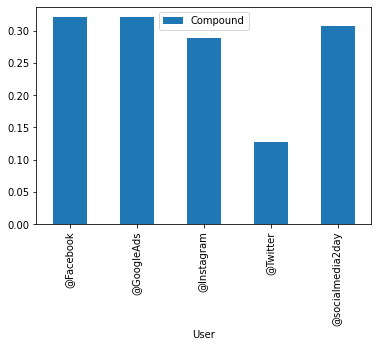

In [51]:
#plotting 
score_table.plot(kind='bar')

In [52]:
#Collect the compound values for each news source
score_table = df.pivot_table(index='User',  values="Positive", aggfunc = np.mean)
score_table

,Positive
User,
@Facebook,0.155410
@GoogleAds,0.130000
@Instagram,0.165805
@Twitter,0.095025
@socialmedia2day,0.177560


<AxesSubplot:xlabel='User'>

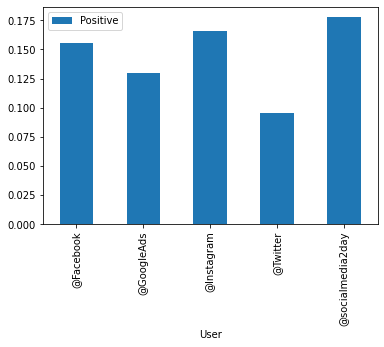

In [53]:
#Collect the negative values for each news source
pos_score_table = df.pivot_table(index='User',  values="Positive", aggfunc = np.mean)
pos_score_table
pos_score_table.plot(kind='bar')

In [54]:
#Collect the compound values for each news source
score_table = df.pivot_table(index='User',  values="Negative", aggfunc = np.mean)
score_table

,Negative
User,
@Facebook,0.026840
@GoogleAds,0.011170
@Instagram,0.052385
@Twitter,0.004685
@socialmedia2day,0.017845


<AxesSubplot:xlabel='User'>

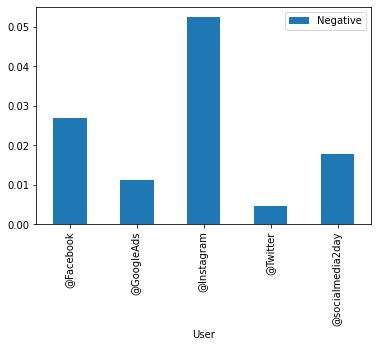

In [55]:
#Collect the negative values for each news source
neg_score_table = df.pivot_table(index='User',  values="Negative", aggfunc = np.mean)
neg_score_table
neg_score_table.plot(kind='bar')

In [56]:
#Collect the negative values for each news source
neg_score_table = df.pivot_table(index='User',  values="Negative", aggfunc = np.mean)
neg_score_table

,Negative
User,
@Facebook,0.026840
@GoogleAds,0.011170
@Instagram,0.052385
@Twitter,0.004685
@socialmedia2day,0.017845


In [57]:
from collections import Counter
import pandas as pd
a = dict(Counter(HT_positive))
t = list(a.items()) #added from line 52
#tuples = [(letter, idx) for idx, letter in enumerate(t)]
df = pd.DataFrame(t, columns=["Hashtags", "Number of Occurence"])
df.to_csv('hashtags.csv', index=False)
df4_saved_file = pd.read_csv('hashtags.csv')
df4_saved_file

,Hashtags,Number of Occurence
0,SMTLive,32
1,content,1
2,startup,1
3,SmallBusinessWeek,2
4,ecommerce,1
5,GML2021,2
6,GoogleIO,2
7,GoogleAdsTutorials,2
8,WomensHistoryMonth,2
9,GoogleForIndia,1
